# Anova

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="Iris dataset" width="600" height="150">

In [ ]:
 # Load libraries
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()

In [ ]:
#iris.data # output is value
iris # output will be dictionary {}

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
df.head()

In [ ]:
df['target'] =iris.target # adding column 'target'
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [ ]:
df[df['target']==0]

In [ ]:
df[df['target']==1]

In [ ]:
df[df['target']==2]

In [ ]:
df[df['target']==0]['sepal width (cm)']

In [ ]:
df[df['target']==1]['sepal width (cm)']

In [ ]:
df[df['target']==2]['sepal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
group1_setosa=df[df['target']==0]['sepal width (cm)']
group2_versicolor=df[df['target']==1]['sepal width (cm)']
group3_virginica=df[df['target']==2]['sepal width (cm)']

In [ ]:
group1_setosa.mean(),group2_versicolor.mean(),group3_virginica.mean()
#mean of sepal width of all 3 categories.

(3.428, 2.7700000000000005, 2.974)

In [ ]:
import seaborn as sns
sns.displot(data=df,
            x='sepal width (cm)',
            hue='target',
            fill=True,
            kind='kde',
            palette=['Blue','Orange','Green'])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.scatter(range(1,51),group1_setosa)
plt.scatter(range(1,51),group2_versicolor)
plt.scatter(range(1,51),group3_virginica)

plt.legend(iris.target_names)
plt.show()

In [ ]:
# f_oneway - one way ANOVA
from scipy import stats
stats.f_oneway(group1_setosa,group2_versicolor,group3_virginica)
# p-value is 4.49*10^-17 which is approximately equal to 0. so p<alfa.
# so reject null hypo. So interpretation: at least 1 of them is different. i.e. setosa is different.

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

In [ ]:
# another example of one way ANOVA
df1=pd.DataFrame(iris.data)
stats.f_oneway(df1.iloc[:,0],df1.iloc[:,1],df1.iloc[:,2],df1.iloc[:,3])
# p = 4.66 * 10^-159 which is approximately = 0. So reject null hypo.
# H0=MUsl = MUsw = MUpl = MUpw, Ha = at least one of them is different

F_onewayResult(statistic=482.91531656927964, pvalue=4.660592480454751e-159)

# Chi-Square Test

In [ ]:
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
# Athlet and Smoker example: These are observed frequencies
data=[[14,4],
      [0,10]]
data

[[14, 4], [0, 10]]

In [ ]:
df=pd.DataFrame(data,
             index=['Athlete','Non-Athlete'], # row names
             columns=['Non-smoker','Smoker']) # column names

In [ ]:
df

,Non-smoker,Smoker
Athlete,14,4
Non-Athlete,0,10


<Axes: >

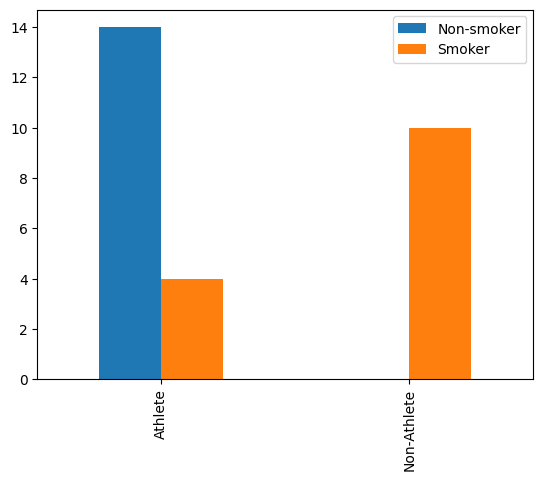

In [ ]:
df.plot(kind='bar',
        stacked=False)

In [ ]:
chi2,p,dof,exp=chi2_contingency(data) # test statistic, p-value,df,expected frequency
# p-value 0.00038 < 0.05 so reject null hypothesis (H0:both variables are indepedendent). Accept Ha: Both variables are dependent

In [ ]:
chi2_contingency(data)

Chi2ContingencyResult(statistic=12.600000000000001, pvalue=0.0003857467556820071, dof=1, expected_freq=array([[9., 9.],
       [5., 5.]]))

In [ ]:
chi2

In [ ]:
p

0.0003857467556820071

In [ ]:
dof

1

In [ ]:
exp

array([[9., 9.],
       [5., 5.]])

In [ ]:
a=0.05
if p<a:
  print("Reject null hypothesis. Smoking and being Athlete are dependent on each other.")
else:
  print("Accept null hypothesis. Smoking and being Athlete are not dependent on each other. )")

Reject null hypothesis. Smoking and being Athlete are dependent on each other.
